In [ ]:
import tensorflow as tf
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
%cd drive/
%cd MyDrive/

df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

Mounted at /content/drive
/content/drive
/content/drive/MyDrive


In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
list_data = [df.name.str.split(' ')[index][0]
             for index in range(0, len(df))]

df.insert(2,'Company',list_data)

final_df2=df[['year','Company','selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]

final_df2=pd.get_dummies(final_df2,drop_first=True)
final_df2.head()

,year,selling_price,km_driven,Company_Audi,Company_BMW,Company_Chevrolet,Company_Daewoo,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Kia,Company_Land,Company_MG,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mitsubishi,Company_Nissan,Company_OpelCorsa,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
feature=list(['year','selling_price','km_driven','fuel_Diesel',	'fuel_Petrol',	'seller_type_Individual',	'transmission_Manual'])
final_df2[feature].corr()

,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual
year,1.000000,0.413922,-0.419688,0.121424,-0.114908,-0.173703,-0.143800
selling_price,0.413922,1.000000,-0.192289,0.282947,-0.269453,-0.236798,-0.530205
km_driven,-0.419688,-0.192289,1.000000,0.285396,-0.291139,0.182663,0.120226
fuel_Diesel,0.121424,0.282947,0.285396,1.000000,-0.970934,-0.035314,-0.048098
fuel_Petrol,-0.114908,-0.269453,-0.291139,-0.970934,1.000000,0.029845,0.039614
seller_type_Individual,-0.173703,-0.236798,0.182663,-0.035314,0.029845,1.000000,0.214163
transmission_Manual,-0.143800,-0.530205,0.120226,-0.048098,0.039614,0.214163,1.000000


In [ ]:
train_dataset = final_df2.sample(frac=0.8, random_state=0)
test_dataset = final_df2.drop(train_dataset.index)
test_dataset.head(n=10)

,year,selling_price,km_driven,Company_Audi,Company_BMW,Company_Chevrolet,Company_Daewoo,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Kia,Company_Land,Company_MG,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mitsubishi,Company_Nissan,Company_OpelCorsa,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
7,2014,240000,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
12,2018,1650000,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
21,2015,850000,25000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
24,2014,250000,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
25,2018,1650000,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
26,2015,585000,24000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
28,2013,390000,33000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
46,2014,1050000,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
train_labels = train_dataset.pop('selling_price') 
test_labels = test_dataset.pop('selling_price')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
year,3472.0,2013.110887,4.242719,1992.0,2011.0,2014.0,2017.0,2020.0
km_driven,3472.0,65785.746832,44845.278036,1.0,35000.0,60000.0,90000.0,560000.0
Company_Audi,3472.0,0.011521,0.106730,0.0,0.0,0.0,0.0,1.0
Company_BMW,3472.0,0.009793,0.098486,0.0,0.0,0.0,0.0,1.0
Company_Chevrolet,3472.0,0.046083,0.209695,0.0,0.0,0.0,0.0,1.0
Company_Daewoo,3472.0,0.000288,0.016971,0.0,0.0,0.0,0.0,1.0
Company_Datsun,3472.0,0.008065,0.089453,0.0,0.0,0.0,0.0,1.0
Company_Fiat,3472.0,0.007488,0.086224,0.0,0.0,0.0,0.0,1.0
Company_Force,3472.0,0.000288,0.016971,0.0,0.0,0.0,0.0,1.0
Company_Ford,3472.0,0.055588,0.229157,0.0,0.0,0.0,0.0,1.0


In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10752     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [ ]:
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2)

Epoch 1/1000
87/87 [==============================] - 2s 7ms/step - loss: 481845936128.0000 - mae: 398698.0000 - mse: 481845936128.0000 - val_loss: 487645773824.0000 - val_mae: 375305.6250 - val_mse: 487645773824.0000
Epoch 2/1000
87/87 [==============================] - 0s 5ms/step - loss: 409111003136.0000 - mae: 353195.9375 - mse: 409111003136.0000 - val_loss: 379120779264.0000 - val_mae: 304373.7812 - val_mse: 379120779264.0000
Epoch 3/1000
87/87 [==============================] - 0s 4ms/step - loss: 346234028032.0000 - mae: 326078.8125 - mse: 346234028032.0000 - val_loss: 371373146112.0000 - val_mae: 308401.5312 - val_mse: 371373146112.0000
Epoch 4/1000
87/87 [==============================] - 0s 5ms/step - loss: 345133121536.0000 - mae: 323269.2188 - mse: 345133121536.0000 - val_loss: 419785932800.0000 - val_mae: 435590.5312 - val_mse: 419785932800.0000
Epoch 5/1000
87/87 [==============================] - 0s 4ms/step - loss: 338278285312.0000 - mae: 323308.6562 - mse: 3382782853

In [ ]:
example_batch = test_dataset[1:6]
print(example_batch)

example_result = model.predict(example_batch)
print(example_result)

    year  km_driven  ...  owner_Test Drive Car  owner_Third Owner
3   2017      46000  ...                     0                  0
7   2014      60000  ...                     0                  0
12  2018      25000  ...                     0                  0
21  2015      25000  ...                     0                  0
24  2014     100000  ...                     0                  0

[5 rows x 41 columns]
[[1011531.2 ]
 [ 782381.3 ]
 [4262265.  ]
 [1021275.56]
 [ 585714.  ]]


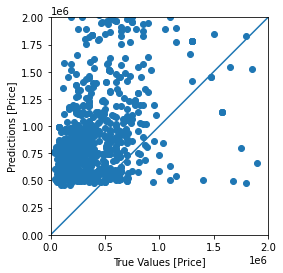

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 2000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

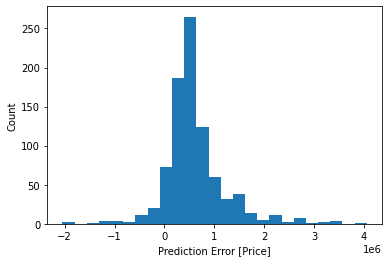

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1y0cru3k/assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)
  